In [10]:
import pandas as pd
import mne
import numpy as np

# Load EEG data from CSV
data_file = r'D:\Frank_Project\EEG_Neurofeedback\data\20240511_05\eegraw_20240511_214051_final.csv'
eeg_data = pd.read_csv(data_file)

eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 
                'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Filtering the data to include only EEG channels
eeg_data_filtered = eeg_data[eeg_channels]

# Transpose the data to fit MNE structure: channels × samples
data_transposed = eeg_data_filtered.transpose().values

# Define sampling frequency
sfreq = 1000  

# Create an MNE Info object, specifying channel types and sampling frequency
info = mne.create_info(ch_names=eeg_channels, sfreq=sfreq, ch_types='eeg')

# Create the Raw object using the data and the info structure
raw = mne.io.RawArray(data_transposed, info)

# Applying the standard 10-20 montage to add electrode locations
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)



Creating RawArray with float64 data, n_channels=32, n_times=178528
    Range : 0 ... 178527 =      0.000 ...   178.527 secs
Ready.


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,35 points
Good channels,32 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,500.00 Hz


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, M1, T7, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 1000.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 64 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 64.00 Hz
- Upper transition bandwidth: 16.00 Hz (-6 dB cutoff frequency: 72.00 Hz)
- Filter length: 207 samples (0.207 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


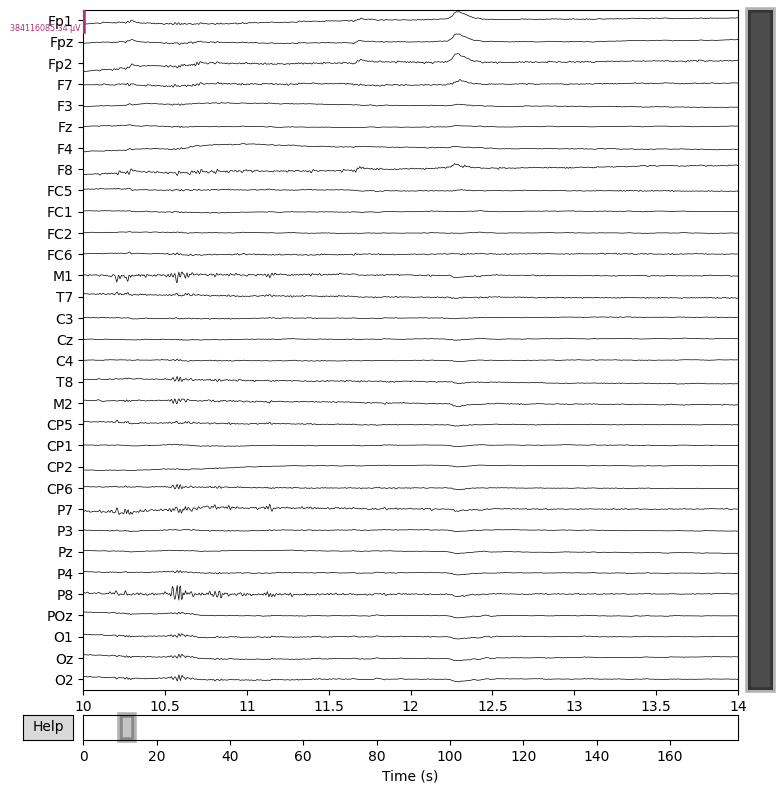

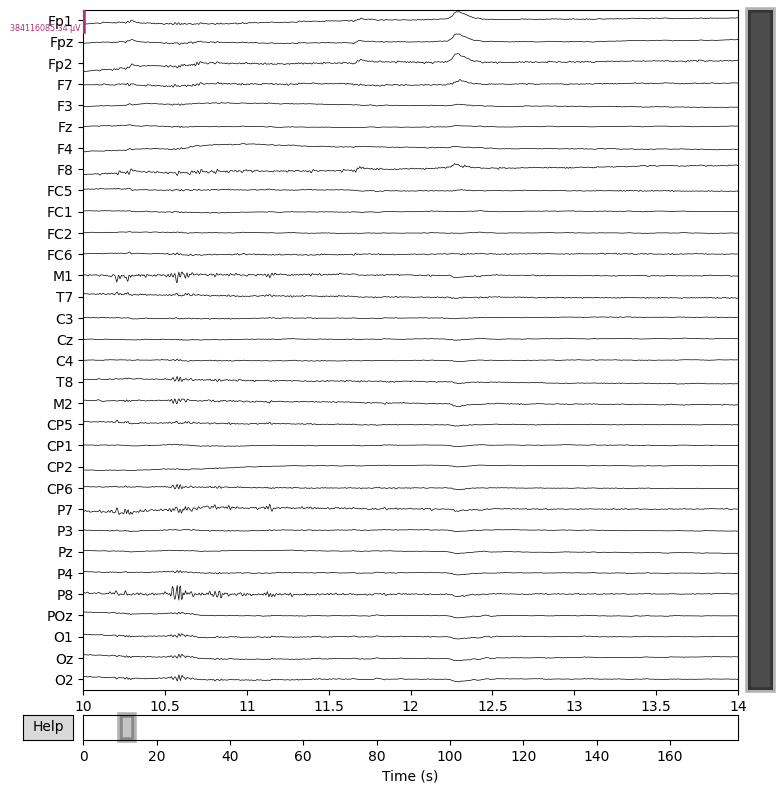

In [14]:
# Displaying the information and plotting the data
print(raw.info)
raw.filter(None, 64.0, fir_design='firwin')
raw.plot(n_channels=32, start=10,duration=4,scalings='auto')  # Modify duration as needed for better visualization
